## Projet de Session IFT712

EDELINE Maxime - edem2901  
L'HERMITE Valentin - lhev1601  
IVANOV Nicolas - ivan2302  

# Présentation

Dans ce fichier, il est possible de d'éxécuter nos algorithmes afin d'analyser les résultats. Nous avons implémentés nos algorithmes de façon à ce qu'une seule ligne se voit modifié si on souhaite utilisé un classifieur différent.

Nous allons travailler sur la base de données "Leaf Classification", fournie par Kaggle. On possède une base de données composé de 990 feuilles. Chaque feuille est caractérisé par 192 attributs. Le modèle doit être capable de déterminer l'espèce d'appartenance de la feuille parmi 99 espèces. Ainsi, l'objectif est d'entraîner le modèle pour qu'il détermine la classe d'appartenance d'une feuilles qu'on lui fourni parmi 99 classes.
Pour cette exercice, nous avons implémenté ces algorithmes:
* ADA Boost
* Perceptron
* Perceptron multicouches
* Random Forest
* Réseaux de neurone convolutifs
* Machines à vecteurs de support

  
  
Additionnellement, nous avons également implémentés trois algorithmes de recherches d'hyperparamètres, à savoir:
* Boostraping
* Sous-échantillonnage croisée
* Validation croisée

On commence par importer toutes les bibliothèques

In [29]:

#Importation des designs patterns strategy
from Modele.ClassifieurLineaire import *
from Modele.RechercheHyperparameter.RechercheHyperparameter import *

#Importation des algorithmes de classification
from Modele.AdaBoost import *
from Modele.Perceptron import *
from Modele.RandomForest import *
from Modele.RandomForestAvecACP import *
from Modele.SVM import *
from Modele.Reseaux_de_Neurone import *
from Modele.Convolutional_Neural_Network import *

#Importation des algorithmes de recherche d'hyperparamètres
from Modele.RechercheHyperparameter.SousEchantillonnageAleatoire import *
from Modele.RechercheHyperparameter.ValidationCroisee import *
from Modele.RechercheHyperparameter.BootstrapValidation import *

#Importation de la classe gestionnaire des données
from Modele.data import TrainData

#Importation d'une librairie de normalisation des données
from sklearn.preprocessing import StandardScaler

On va commencer par charger le jeu de données Leaf-Classification

<class 'torch.Tensor'>
torch.Size([989, 1, 224, 224])
(224, 224, 1)


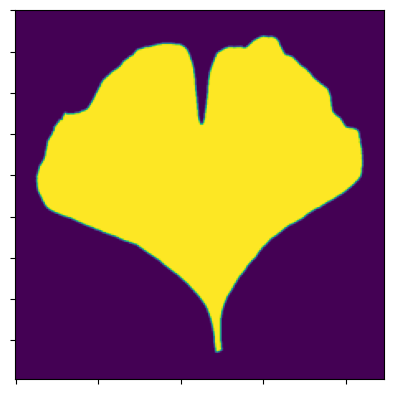

In [30]:
#Répertoire du fichier train.csv
repertoire = "../leaf-classification/train.csv"
trainData = TrainData(repertoire)

# X = données
# T = étiquettes de classes associées aux données
X, T = trainData.data, trainData.leafClass

#Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Séparation des données en groupe d'entrainement et groupe de test selon la proportion de la base de test
proportion_base_de_test = 0.2
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=proportion_base_de_test, random_state=42)

# Nous devons décommenter la partie suivante pour l'execution du CNN

trainData = TrainData(repertoire)

train_loader = trainData.read_image(data_dir="../leaf-classification/images")
trainData.imshow()

dataiter = torch.utils.data.DataLoader.__iter__((train_loader))
images, labels = dataiter.__next__()

X_train, X_test, T_train, T_test = train_test_split(images, labels, test_size=0.2, random_state=42)





On choisi ensuite l'algorithme de classifieur à utilisé et l'lagorithme de recherche d'hyperparamètres, pour chacun des algorithmes ci-dessous, nous avons mis les hyperparamètres les plus optimaux que nous avons trouvé après avoir réalisé une recherche. Pour tester un algorithme, décommentez-le et commenté l'algorithme qui était utilisé.

In [31]:
######################################################################################################
#####               Ligne à modifier pour changer l'algorithme de classification                  ####
######################################################################################################

#strategie_classifieur = Perceptron(learning_rate=0.112,max_iterations=500,penalty='l2')
#strategie_classifieur = Reseaux_Neurones((64,64)) 
#strategie_classifieur = AdaBoost(n_estimators=200, learning_rate=0.01, random_state=0, algorithm="SAMME.R", max_depth_tree_classifieur=3)
#strategie_classifieur = RandomForest(n_estimators=123, criterion="gini")
#strategie_classifieur = SVM(kernel='rbf', C=10.0)

# Pour executer le CNN il faut aussi décommenté la partie traitement d'image au dessus
strategie_classifieur = Net()


#######################################################################################################
#####           Ligne à modifier pour changer l'algorithme de recherche d'hyperparamètres          ####
#######################################################################################################
strategie_recherche = ValidationCroisee(k=10)
#strategie_recherche = SousEchantillonnage(k=10, proportion_validation=0.2)
#strategie_recherche = BootstrapValidation(n_bootstrap=5,k_fold=5)


#Construction du classifieur
classifieur = ClassifieurLineaire(strategie_classifieur)

In [32]:

#Recherche d'Hyperparametre
recherche = RechercheHyperparameter(strategie_recherche)

#Recherche des hyperparamètres
recherche.recherche(classifieur, X, T)


AttributeError: 'Net' object has no attribute 'get_hyperparametres'

In [ ]:
#Entrainement du modèle
classifieur.entrainement(X_train, T_train)

c:\Users\Val\Documents\GitHub\Projet_de_Session _IFT712_Edeline_Ivanov_L'Hermite\Projet_de_Session_IFT712_Edeline_Ivanov_L-Hermite\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


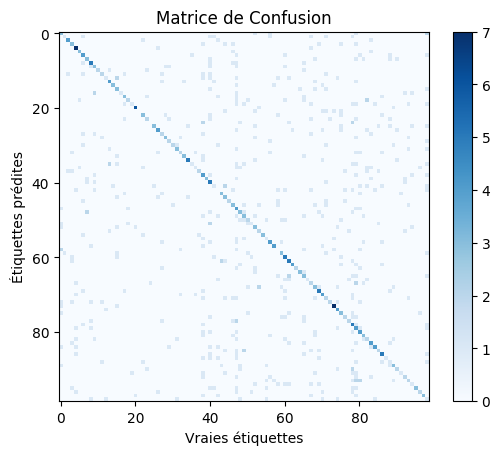

Base D'entrainement : 
precision: 0.4321976753521879
rappel: 0.34513274336283184
f1: 0.35010471067126414


c:\Users\Val\Documents\GitHub\Projet_de_Session _IFT712_Edeline_Ivanov_L'Hermite\Projet_de_Session_IFT712_Edeline_Ivanov_L-Hermite\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Val\Documents\GitHub\Projet_de_Session _IFT712_Edeline_Ivanov_L'Hermite\Projet_de_Session_IFT712_Edeline_Ivanov_L-Hermite\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


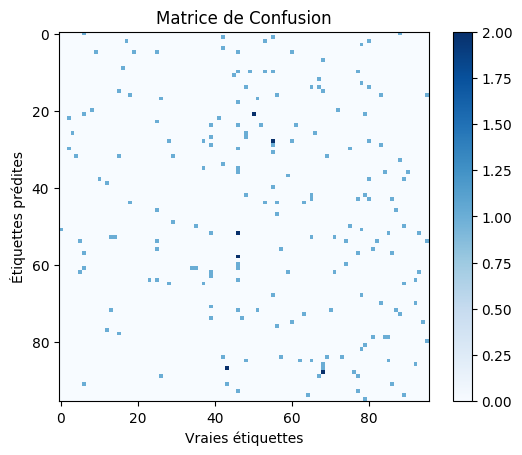


Base de Test : 
precision: 0.025252525252525252
rappel: 0.015151515151515152
f1: 0.01738816738816739


In [ ]:
#Prédiction et Affichage

#Prediction sur la base de test
predictions = classifieur.prediction(X_test) 


if type(strategie_classifieur) == Net and type(T_test) is not list:
    _, y_test_pred = torch.max(T_test, 1)
    T_test = y_test_pred.tolist()

    _, y_train_pred = torch.max(T_train, 1)
    T_train = y_train_pred.tolist()


#Calcul de différentes metrique d'évaluation sur la base d'entrainement
precision, rappel, f1, _ = classifieur.evaluer(X_train, T_train)
print(f'Base D\'entrainement : ')
print(f'precision: {precision}')
print(f'rappel: {rappel}')
print(f'f1: {f1}')


#Calcul de différentes metrique d'évaluation sur la base de test
precision, rappel, f1, _ = classifieur.evaluer(X_test,T_test)
print(f'\nBase de Test : ')
print(f'precision: {precision}')
print(f'rappel: {rappel}')
print(f'f1: {f1}')

if type(strategie_classifieur) != Net:
    #Affichage des résultats dans un espace à deux dimensions
    classifieur.afficher_donnees_et_modele(X_train, T_train, X_test, T_test)